In [3]:
import pandas as pd

data = pd.read_csv(
    "../../Module2/0-Data/balance-scale.data", names=["Class", "LW", "LD", "RW", "RD"]
)
pd.set_option("display.max_columns", len(data.columns))
print(len(data.columns))
data.head()

5


,Class,LW,LD,RW,RD
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [4]:
data["Class"] = data["Class"].map({"R": 1, "L": 2, "B": 0})

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
import keras

x = data.drop("Class", axis=1)
y = data["Class"]

normalizer = MinMaxScaler(feature_range=(0, 1))
x_norm = normalizer.fit_transform(x)

skfold = StratifiedKFold(n_splits=5, shuffle=True)

x_train, x_test, y_train, y_test = train_test_split(
    x_norm, y, test_size=0.2, stratify=y
)

for train_index, test_index in skfold.split(x_norm, y):
    x_train, x_test = x_norm[train_index], x_norm[test_index]
    y_train, y_test = y[train_index], y[test_index]

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [5]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam


model = Sequential()
model.add(keras.Input((x_norm.shape[1],)))
model.add(Dense(50, kernel_initializer="normal", activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(50, kernel_initializer="normal", activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(50, kernel_initializer="normal", activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(3, kernel_initializer="normal", activation="softmax"))

optimizer = Adam(amsgrad=True)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["acc"])
historic = model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=50,
    validation_data=(x_test, y_test),
    verbose=1,
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.3861 - loss: 1.0967 - val_acc: 0.4640 - val_loss: 1.0884
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4195 - loss: 1.0855 - val_acc: 0.4640 - val_loss: 1.0693
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4325 - loss: 1.0636 - val_acc: 0.4640 - val_loss: 1.0272
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4640 - loss: 1.0128 - val_acc: 0.4640 - val_loss: 0.9540
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4341 - loss: 0.9528 - val_acc: 0.4640 - val_loss: 0.9040
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4537 - loss: 0.9106 - val_acc: 0.4880 - val_loss: 0.8905
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5888 - loss: 0.9101 - val_acc: 0.7920 - val_loss: 0.8691
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6455 - loss: 0.9330 - val_acc: 0.8480 - val_loss: 0.8305
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.727

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,014 (86.00 KB)

 Trainable params: 5,503 (21.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,511 (64.50 KB)

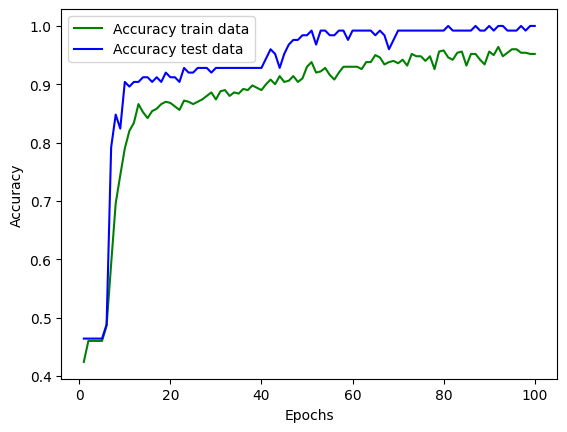

In [7]:
import matplotlib.pyplot as plt

accuracy_train = historic.history["acc"]
accuracy_test = historic.history["val_acc"]
epochs = range(1, len(accuracy_train) + 1)

plt.plot(epochs, accuracy_train, "-g", label="Accuracy train data")
plt.plot(epochs, accuracy_test, "-b", label="Accuracy test data")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()